# 1 Dataset Selection and Problem Definition



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_df.shape

(1460, 81)

# 2 Data Preprocessing

In [ ]:
# Check for missing values
missing_values = train_df.isnull().sum()

In [ ]:
# Shows the number of missing values for each column in train.csv
missing_values[missing_values > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
columns_to_drop = ["PoolQC", "MiscFeature", "Alley", "Fence"]
train_df = train_df.drop(columns=columns_to_drop)

In [ ]:
# Check the final shape
print("Final shape:", train_df.shape)

Final shape: (1460, 77)


In [ ]:
# Show remaining columns
print("Remaining columns:", train_df.columns)

Remaining columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       '

In [ ]:
# Fill missing values for numerical columns with median
num_cols = train_df.select_dtypes(include=["number"]).columns
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())

In [ ]:
# Fill missing values for categorical columns with mode
cat_cols = train_df.select_dtypes(include=["object"]).columns
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])

In [ ]:
# Confirm no missing values left
print(train_df.isnull().sum().sum(), "missing values remaining")

0 missing values remaining


In [ ]:
# Import preprocessing from Sklearn and practice scaling, min-max scaler
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Copy the original dataset
scaled_df = train_df.copy()

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns only (excluding target 'SalePrice' if needed)
num_cols = scaled_df.select_dtypes(include=["number"]).columns

# Apply MinMax Scaling
scaled_df[num_cols] = scaler.fit_transform(scaled_df[num_cols])

# Show transformed dataset
print(scaled_df.head())

         Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
0  0.000000    0.235294       RL     0.150685  0.033420   Pave      Reg   
1  0.000685    0.000000       RL     0.202055  0.038795   Pave      Reg   
2  0.001371    0.235294       RL     0.160959  0.046507   Pave      IR1   
3  0.002056    0.294118       RL     0.133562  0.038561   Pave      IR1   
4  0.002742    0.235294       RL     0.215753  0.060576   Pave      IR1   

  LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0         Lvl    AllPub    Inside  ...      0.000000       0.0         0.0   
1         Lvl    AllPub       FR2  ...      0.000000       0.0         0.0   
2         Lvl    AllPub    Inside  ...      0.000000       0.0         0.0   
3         Lvl    AllPub    Corner  ...      0.492754       0.0         0.0   
4         Lvl    AllPub       FR2  ...      0.000000       0.0         0.0   

  PoolArea MiscVal    MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    

In [ ]:
# One-Hot Encode categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)

# Confirm all columns are numerical now
print(train_df.dtypes.value_counts())

bool       199
int64       35
float64      3
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Make a copy of the DataFrame
encoded_df = train_df.copy()

# Select categorical columns
cat_cols = encoded_df.select_dtypes(include=["object"]).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit and transform categorical columns
encoded_cols = encoder.fit_transform(encoded_df[cat_cols])

# Convert to DataFrame
encoded_df_onehot = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_cols))

# Reset index to align with the original DataFrame
encoded_df_onehot.index = encoded_df.index

# Drop original categorical columns and merge encoded features
encoded_df = encoded_df.drop(columns=cat_cols).join(encoded_df_onehot)

# Display the updated DataFrame
print(encoded_df.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleType_New  SaleType_Oth  SaleTyp

In [ ]:
# Make a copy to preserve the original dataset
df_selected = train_df.copy()

# Dropping the 'Id' column since it's not useful for prediction
df_selected.drop(columns=['Id'], inplace=True)

# Finding correlation with SalePrice
correlation_matrix = df_selected.corr()
correlation_with_target = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)

In [ ]:
# Display top 10 most correlated features with SalePrice
print(correlation_with_target.head(15))

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
ExterQual_TA        0.589044
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
KitchenQual_TA      0.519298
GarageFinish_Unf    0.513906
YearRemodAdd        0.507101
BsmtQual_TA         0.498545
Name: SalePrice, dtype: float64


In [ ]:
# Feature Engineering: Creating new useful features
df_selected['HouseAge'] = df_selected['YrSold'] - df_selected['YearBuilt']
df_selected['RemodelAge'] = df_selected['YrSold'] - df_selected['YearRemodAdd']
df_selected['TotalBathrooms'] = df_selected['FullBath'] + (df_selected['HalfBath'] * 0.5) + \
                                df_selected['BsmtFullBath'] + (df_selected['BsmtHalfBath'] * 0.5)

In [ ]:
# Dropping features with high correlation (optional)
# For example, if GarageCars and GarageArea are highly correlated, we can keep one
df_selected.drop(columns=['GarageCars'], inplace=True)

In [ ]:
# Checking the final dataset shape
print("Final dataset shape:", df_selected.shape)

Final dataset shape: (1460, 238)


In [ ]:
train_df.shape

(1460, 237)

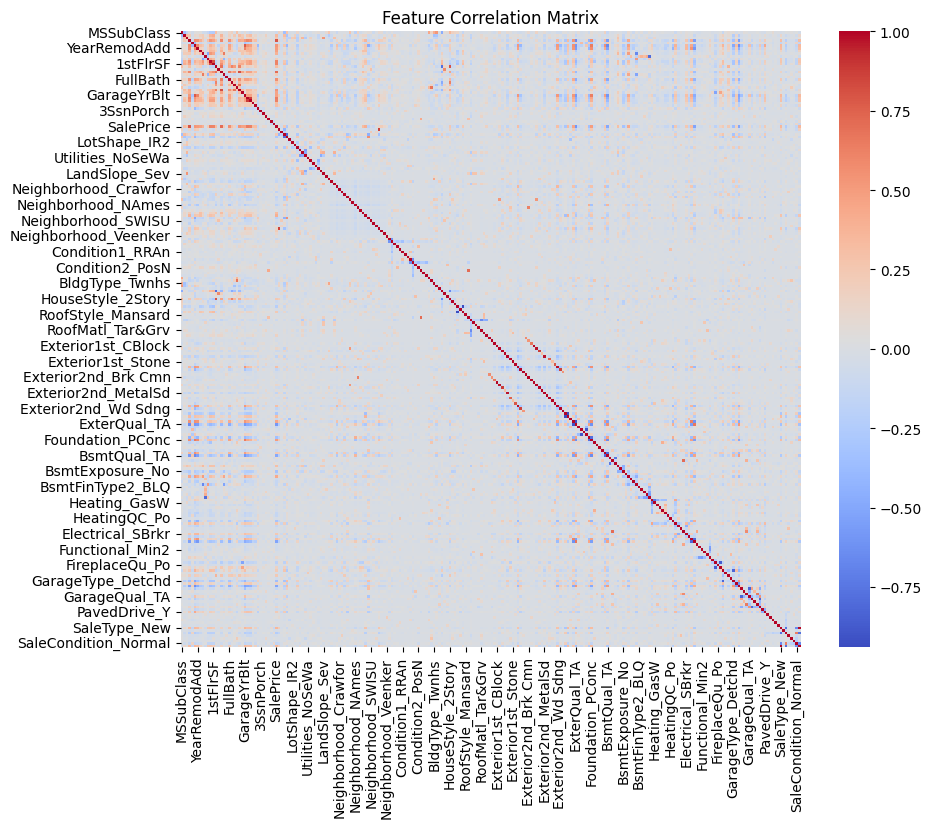

In [ ]:
# Plotting heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Create new engineered features
train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
train_df["HouseAge"] = train_df["YrSold"] - train_df["YearBuilt"]
train_df["RemodelAge"] = train_df["YrSold"] - train_df["YearRemodAdd"]
train_df["TotalBathrooms"] = (
    train_df["FullBath"] + (0.5 * train_df["HalfBath"]) +
    train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"])
)
train_df["IsNew"] = (train_df["YearBuilt"] == train_df["YrSold"]).astype(int)


In [ ]:
# Drop the original columns now that they are redundant
drop_cols = ["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "YearBuilt", "YrSold",
             "YearRemodAdd", "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"]
train_df.drop(columns=drop_cols, inplace=True)

In [ ]:
# Show new dataset shape
print("Updated dataset shape:", train_df.shape)

Updated dataset shape: (1460, 232)


# 3 Exploratory Data Analysis

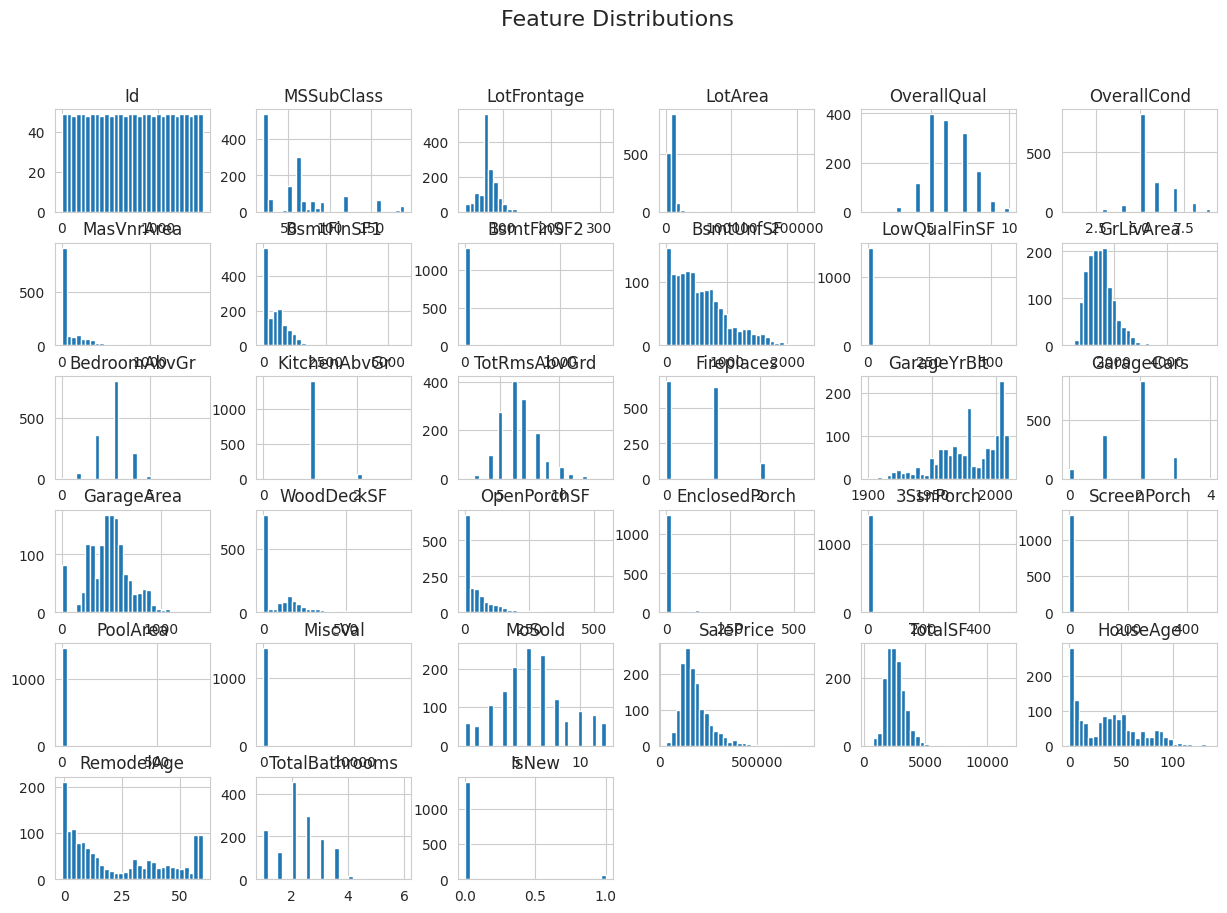

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Histograms: Visualizing distributions of key numerical features
train_df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

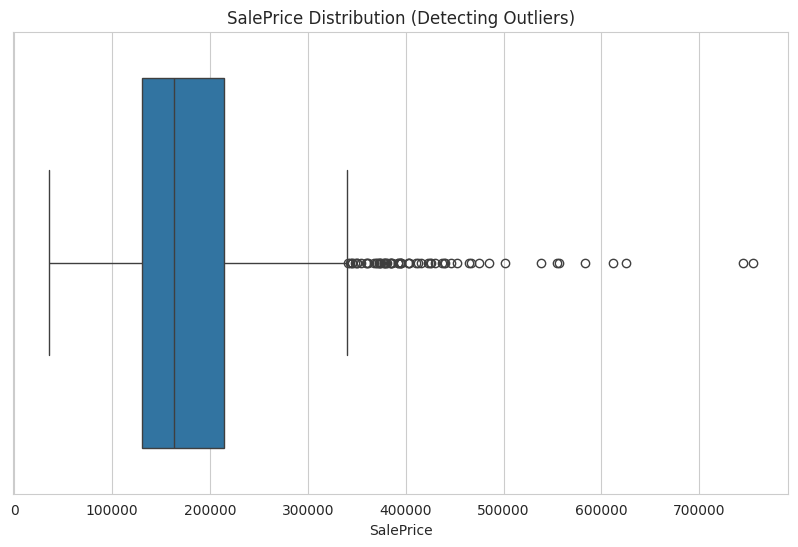

In [ ]:
# Box plots: Checking for outliers in SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df["SalePrice"])
plt.title("SalePrice Distribution (Detecting Outliers)")
plt.show()

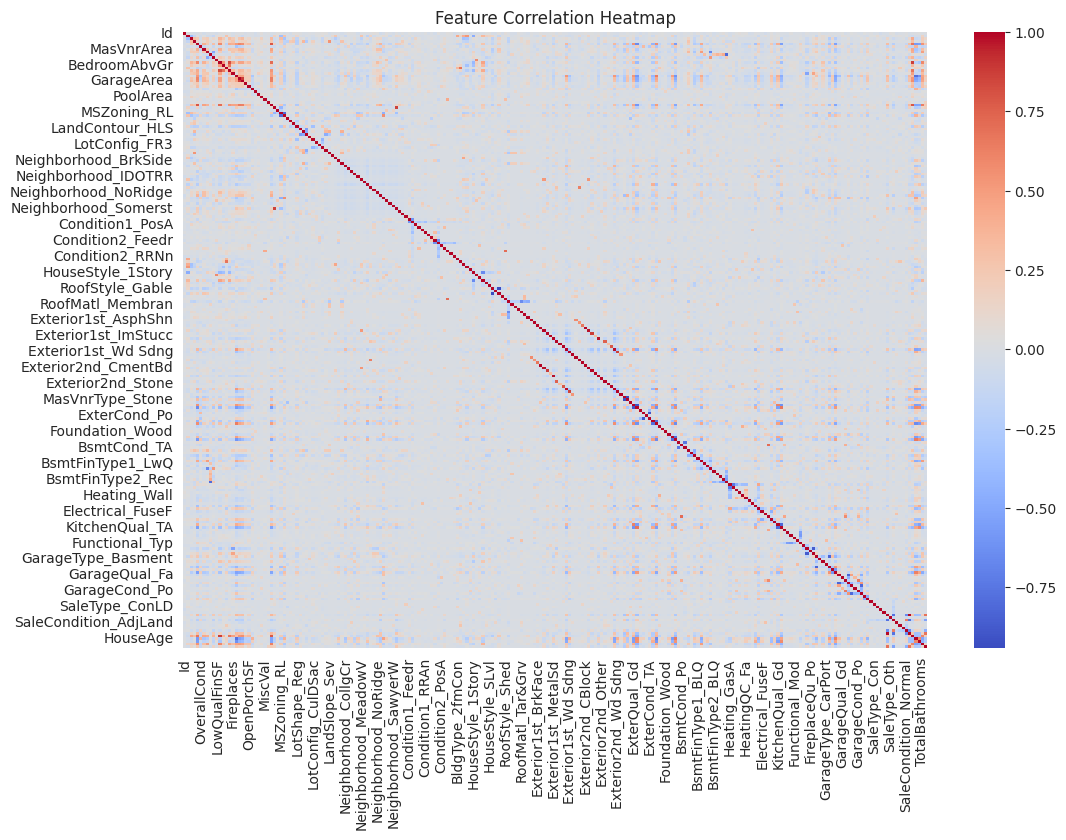

In [ ]:
# Correlation Heatmap: Finding relationships between variables
plt.figure(figsize=(12, 8))
corr = train_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Check correlation of features with SalePrice
corr_target = corr["SalePrice"].sort_values(ascending=False)
print("Top features correlated with SalePrice:\n", corr_target.head(10))

Top features correlated with SalePrice:
 SalePrice           1.000000
OverallQual         0.790982
TotalSF             0.782260
GrLivArea           0.708624
GarageCars          0.640409
TotalBathrooms      0.631731
GarageArea          0.623431
TotRmsAbvGrd        0.533723
Foundation_PConc    0.497734
MasVnrArea          0.472614
Name: SalePrice, dtype: float64


In [ ]:
# Compute correlation with SalePrice
correlation_matrix = train_df.corr()
top_corr_features = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Display top correlated features (keeping only the highest ones)
print("Top features correlated with SalePrice:\n", top_corr_features.head(15))

Top features correlated with SalePrice:
 SalePrice               1.000000
OverallQual             0.790982
TotalSF                 0.782260
GrLivArea               0.708624
GarageCars              0.640409
TotalBathrooms          0.631731
GarageArea              0.623431
TotRmsAbvGrd            0.533723
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.466754
ExterQual_Gd            0.452466
BsmtFinType1_GLQ        0.434597
Neighborhood_NridgHt    0.402149
Name: SalePrice, dtype: float64


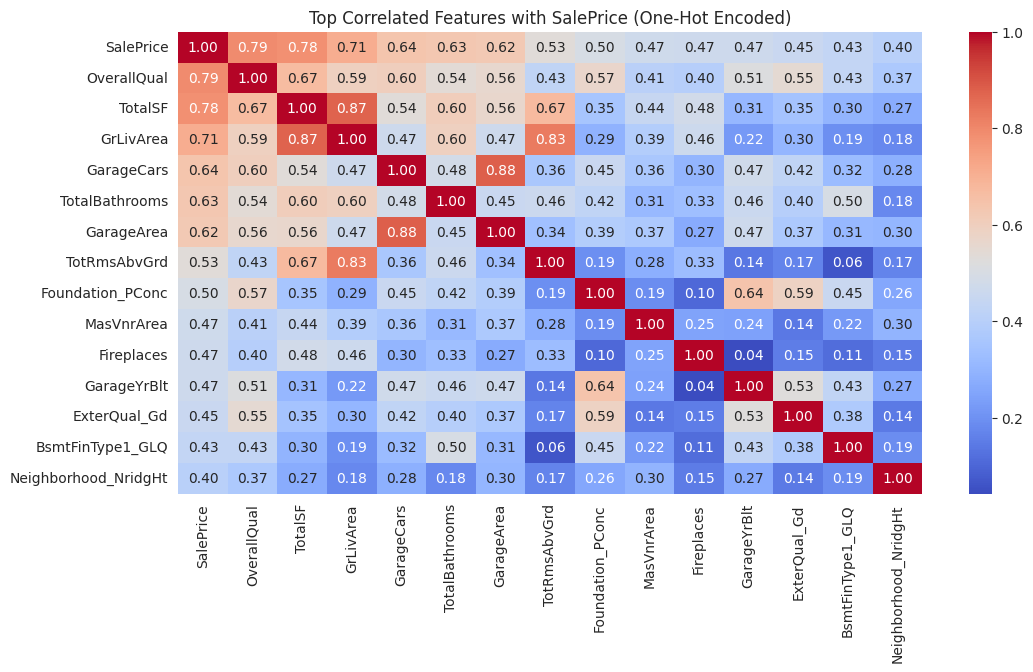

In [ ]:
# Heatmap of top correlated features (both numerical and encoded categorical)
plt.figure(figsize=(12, 6))
sns.heatmap(train_df[top_corr_features.index[:15]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with SalePrice (One-Hot Encoded)")
plt.show()

In [ ]:
# Compute correlation with SalePrice
correlation = train_df.corr()['SalePrice'].sort_values(ascending=False)

# Select the top correlated features
top_features = correlation.index[:15]  # Top 15 correlated features

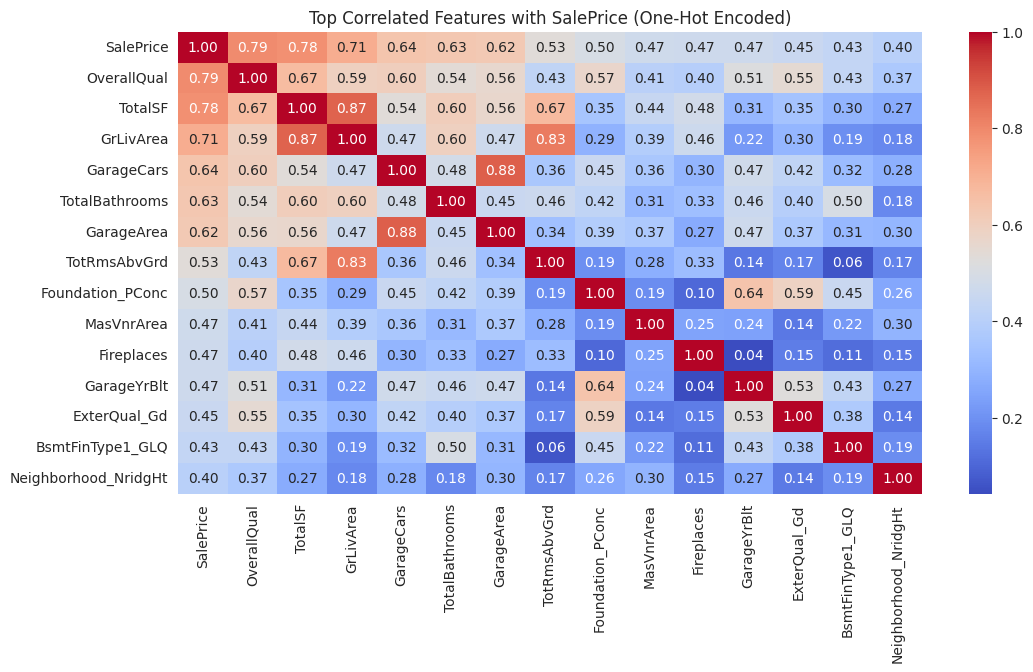

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train_df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with SalePrice (One-Hot Encoded)")
plt.show()

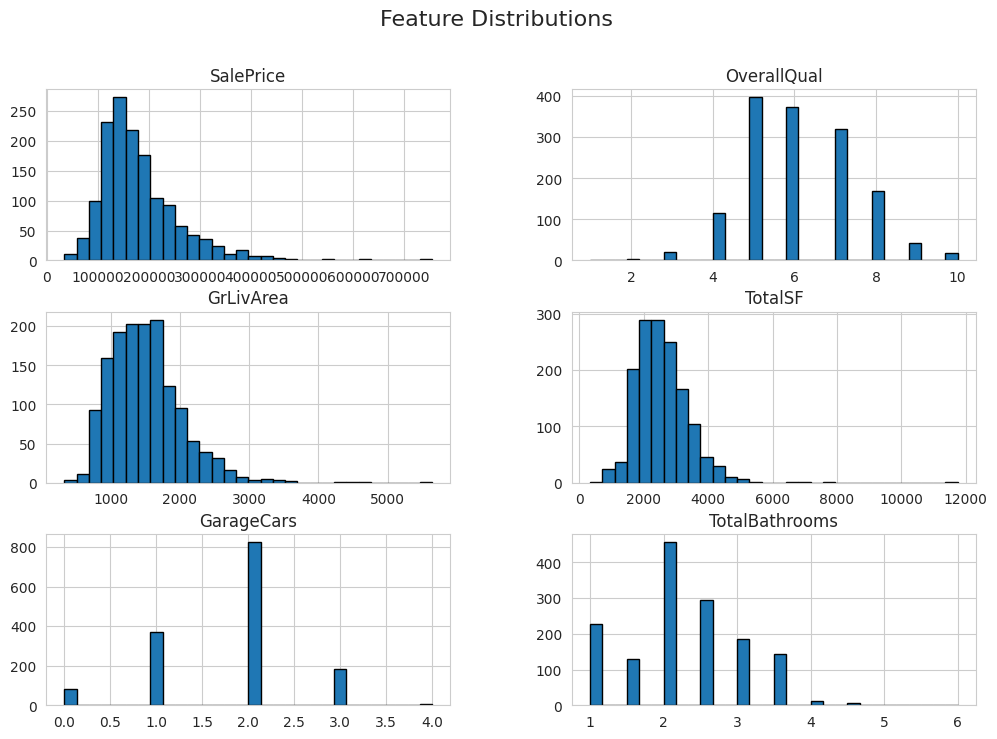

In [ ]:
# Select important numerical features
num_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalSF', 'GarageCars', 'TotalBathrooms']

# Plot histograms
train_df[num_features].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

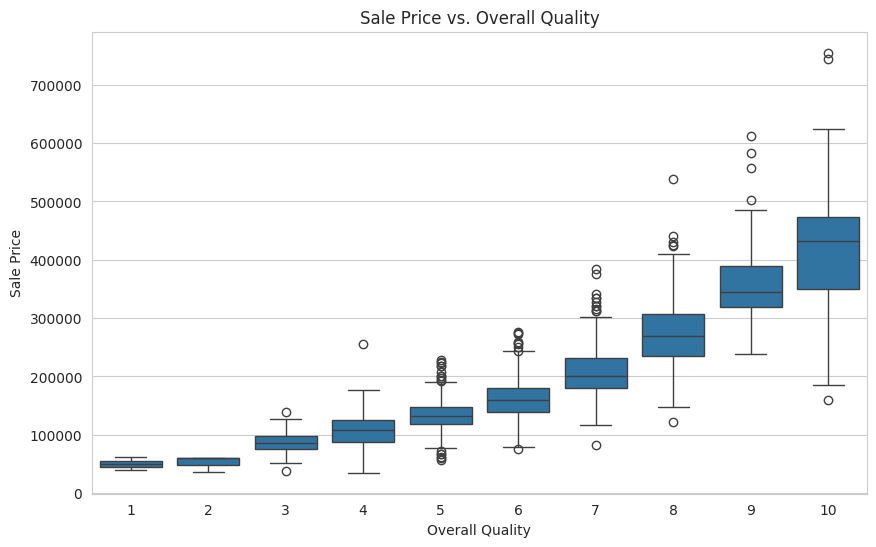

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['OverallQual'], y=train_df['SalePrice'])
plt.title("Sale Price vs. Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

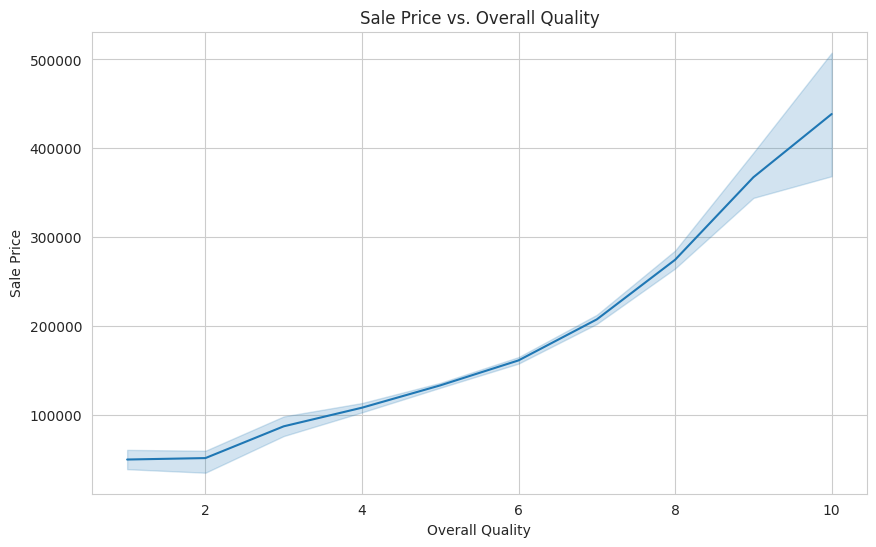

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=train_df['OverallQual'], y=train_df['SalePrice'])
plt.title("Sale Price vs. Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

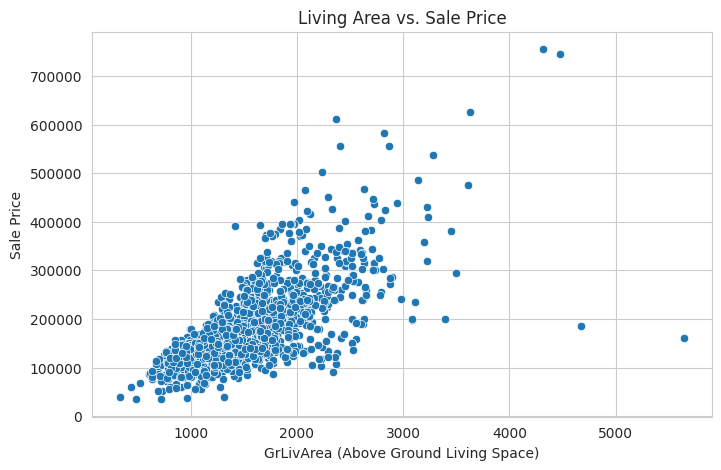

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title("Living Area vs. Sale Price")
plt.xlabel("GrLivArea (Above Ground Living Space)")
plt.ylabel("Sale Price")
plt.show()

#3 Model development and Evaluation

## **3.1.1 Training the Linear Regression model**

In [ ]:
# Training the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
y = train_df["SalePrice"]
X = train_df.select_dtypes(include=[np.number]).drop(columns=["SalePrice"])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## **3.1.2 Evaluating Linear Regression Models**

In [ ]:
# Evaluating Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_preds = lr_model.predict(X_test)

# Calculate R², MAE, and RMSE
lr_r2 = r2_score(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)

# Calculate MSE and then take the square root to get RMSE
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = lr_mse ** 0.5

print(f"R² Score: {lr_r2:.3f}")
print(f"Mean Absolute Error: {lr_mae:.2f}")
print(f"Root Mean Squared Error: {lr_rmse:.2f}")


R² Score: 0.825
Mean Absolute Error: 22958.21
Root Mean Squared Error: 36586.72


## **3.1.3 Visualising Linear Regression Predictions**

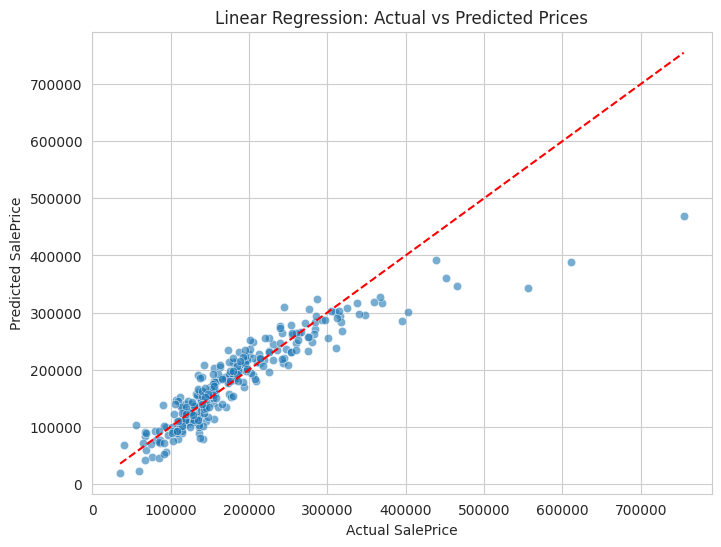

In [ ]:
# Visualize predictions for Linear Regression
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()


## **3.2.1 Training the Decision Tree Regressor (Supervised)**

In [ ]:
# Training Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

## **3.2.2 Evaluating the Decision Tree**

In [ ]:
# Evaluating Decision Tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dt_preds = dt_model.predict(X_test)

dt_r2 = r2_score(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = dt_mse ** 0.5

print(f"R² Score: {dt_r2:.3f}")
print(f"Mean Absolute Error: {dt_mae:.2f}")
print(f"Root Mean Squared Error: {dt_rmse:.2f}")


R² Score: 0.785
Mean Absolute Error: 25944.92
Root Mean Squared Error: 40588.50


## **3.2.3  Visualising Decision Tree Predictions**

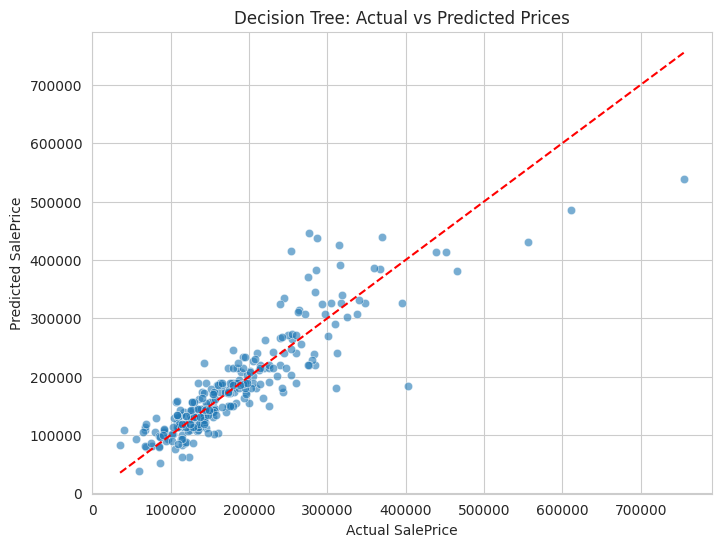

In [ ]:
# Visualising predictions for Decision Tree
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=dt_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Decision Tree: Actual vs Predicted Prices")
plt.show()


## **3.3.1 Applying K-Means Clustering**

In [ ]:
# Applying K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit KMeans with 3 clusters (arbitrary choice for analysis)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


## **3.3.2 Evaluating K-Means (Silhouette Score etc)**

In [ ]:
# Evaluating K-Means using Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score for K-Means Clustering: {score:.3f}")


Silhouette Score for K-Means Clustering: 0.796


## **3.3.3 Visualising Clusters**

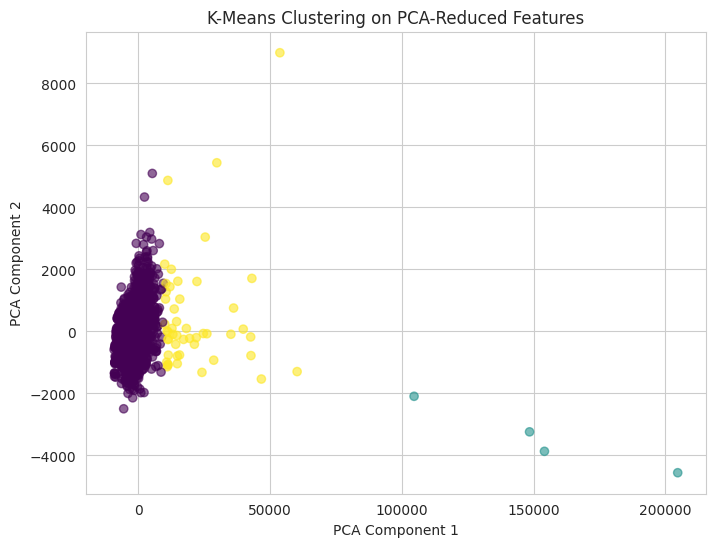

In [ ]:
# Visualising K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("K-Means Clustering on PCA-Reduced Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
